# Exploratory Data Analysis on possibilities of Heart Attack



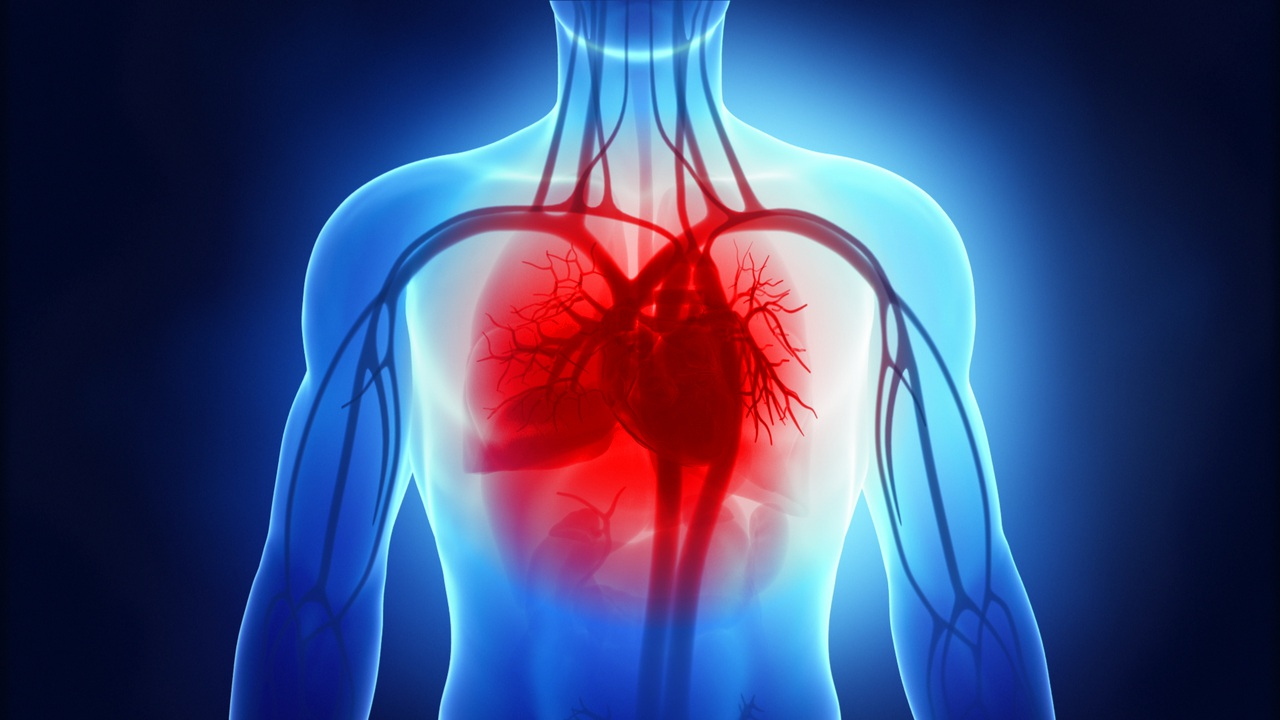


Every year, almost 17 million individuals die from cardiovascular disorders, which primarily manifest as myocardial infarctions and heart failure. In India alone more than 3 million people die every year due to heart attack which is cased due to decreased blood flow or blockage in the coronary arteries which leads to the damage of heart muscles. The blockage occured due to the build of Fat, Cholesterol or any other materials in the coronary arteries.

In this project we will explore the causes and possibilities of heart attack and identify the potential correlations with factors such as age, gender, chest pain, exercise-induced angina, cholesterol levels, and blood sugar level and more using the visualization of the data using the python libraries (Seaborn and matplotlib) 

## Dataset Source 

#### The dataset can be obtained from 
Kaggle - 'https://www.kaggle.com/datasets/nareshbhat/health-care-data-set-on-heart-attack-possibility' 


The Dataset contains the details about 303 patients with the following attributes

1. Age - Contains the age of patients in years


2. Sex - Gender
   
   0= female  
   1= male  
 <br>   
3. cp - Chest pain


    0= asymptomatic      
    1= typcial angina    
    2= atypical angina   
    3= non-typical angina    

4. trestbps- resting blood pressure(in mmHg on admission to the hospital)  


5. chol- serunm cholestrol level in mg/dl
  
  
6. fbs- fasting blood sugar > 120mg/dl(normal level)


    0= normal fbs
    1= high fbs


7. restecg- resting electrocardiographic results


    0= normal
    1= having ST-T wave abnormality
    2= probable or definite left ventrical hypertrophy



8. thalach- maximum heart rate achieved 
    
    
9. exang - exercise induced angina


    0= no exang
    1= has exang
 
 
10. oldpeak ST depression induced by exercise relative to rest
 
 
    1= unsloping
    2= flat
    3= downsloping


12. ca - number of major vessels (0-3) coloured by flouroscopy
    
    
13. thal -thalessemia; a hereditary blood disorder with an abnormal hemoglobin level


    0= null(dropped off from previous dataset)
    1= fixed defect(no blood flow in some part of the heart)
    2= normal blood flow
    3= reversible defect(a blood flow is observed but it is not normal
   
   
14. target 
    
    
    0= no heart attack
    1= there is heart attack

## Downloading the Dataset

Let's download the dataset from kaggle using the opendatasets python library


In [2]:
data ='https://www.kaggle.com/datasets/nareshbhat/health-care-data-set-on-heart-attack-possibility' 


In [3]:
!pip install jovian opendatasets --upgrade --quiet

In [5]:
import opendatasets as od
od.download(data)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mohanlala
Your Kaggle Key: ········


100%|██████████| 3.40k/3.40k [00:00<00:00, 2.48MB/s]

Let's assign the downloaded datase into a new directory

In [6]:
data_dir= './health-care-data-set-on-heart-attack-possibility'


Lets verify the contents of the data_dir using the os module 

In [7]:
import os
#views the list of files in the directory
os.listdir(data_dir)

['heart.csv']

In [8]:
project_name = "Heart_attack-possiblity" 


## Data Preparation and Cleaning

Data cleaning is the most important process of Exploratory data analysis  as it help us to find any missing values, errors and duplicate records. It will help us in better representation of data during visualization process.

Lets the laod the dataset in the pandas dataframe see the contents of the dataframe


In [9]:
import pandas as pd

In [10]:
heart =('./health-care-data-set-on-heart-attack-possibility/heart.csv')

#creating a datafarme
heart_df= pd.read_csv(heart)

In [11]:
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


As we can already see the data and it is having 303 rows and 14 columns.
we need a more detailed presentation of dataframe



Now Lets view the attributes of the heart_df by using .column method



In [12]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

As we can now see the names of the attributes in our datafarme but some of the attribute names are not understandable 
so lets change the column names to more readable formats 

In [13]:
# creating a dictonary of new column names
col_names={ 'cp':'Chest_pain_type', 'trestbps':'resting blood pressure', 'chol':'serum cholestrol level(mg/dl)', 'fbs':'fasting blood sugar > 120 mg/dl',
           'restecg':'resting electrocardiographic results', 'thalach':'maximum heart rate achieved',
       'exang':'exercise induced angina', 
     'slope':'slope of the peak exercise ST segment', 'ca':'number of major vessels colored by flourosopy','thal':'Thalessemia'}

Now Lets quickly Rename the column names

In [14]:
heart_df.rename(columns=col_names,inplace=True)

In [15]:
heart_df

,age,sex,Chest_pain_type,resting blood pressure,serum cholestrol level(mg/dl),fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of the peak exercise ST segment,number of major vessels colored by flourosopy,Thalessemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Now our Columns are in more readable format

Lets also convert the values in our df to a more human-readable form 

First of all assign the values for each code in the dictionary and then we will replace the values of the dataframe 

In [16]:
gender = {1:"Male",0:"Female"}
chest_pain={0:'asymptomatic', 1:'typical angina', 2: 'atypical angina', 3:'non-anginal pain'}
fast_blood_sugar={0:'normal', 1: 'high'}
rest_ecg={0:'normal', 1: 'having ST-T wave abnormality', 2:'probable or definite left ventriculat hypertrophy'}
slope= {2: 'upsloping', 1: 'flat', 0:'downsloping'}
tar={0:'No',1:'Yes'}
thal={0:None,1:'fixed defect',2:'normal blood flow',3:'reversible defect'}
exang={0:'No',1:'Yes'}

Now Lets make use of the replace function on pandas to replace the values of the dataframe

In [17]:
heart_df['Chest_pain_type'].replace(chest_pain,inplace=True)
heart_df['fasting blood sugar > 120 mg/dl'].replace(fast_blood_sugar,inplace=True)
heart_df['resting electrocardiographic results'].replace(rest_ecg,inplace=True)
heart_df['slope of the peak exercise ST segment'].replace(slope,inplace=True)
heart_df['target'].replace(tar,inplace=True)
heart_df['Thalessemia'].replace(thal,inplace=True)
heart_df['sex'].replace(gender,inplace=True)

Now Our dataframe should be in more readable format 

In [18]:
heart_df

,age,sex,Chest_pain_type,resting blood pressure,serum cholestrol level(mg/dl),fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of the peak exercise ST segment,number of major vessels colored by flourosopy,Thalessemia,target
0,63,Male,non-anginal pain,145,233,high,normal,150,0,2.3,downsloping,0,fixed defect,Yes
1,37,Male,atypical angina,130,250,normal,having ST-T wave abnormality,187,0,3.5,downsloping,0,normal blood flow,Yes
2,41,Female,typical angina,130,204,normal,normal,172,0,1.4,upsloping,0,normal blood flow,Yes
3,56,Male,typical angina,120,236,normal,having ST-T wave abnormality,178,0,0.8,upsloping,0,normal blood flow,Yes
4,57,Female,asymptomatic,120,354,normal,having ST-T wave abnormality,163,1,0.6,upsloping,0,normal blood flow,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,asymptomatic,140,241,normal,having ST-T wave abnormality,123,1,0.2,flat,0,reversible defect,No
299,45,Male,non-anginal pain,110,264,normal,having ST-T wave abnormality,132,0,1.2,flat,0,reversible defect,No
300,68,Male,asymptomatic,144,193,high,having ST-T wave abnormality,141,0,3.4,flat,2,reversible defect,No
301,57,Male,asymptomatic,130,131,normal,having ST-T wave abnormality,115,1,1.2,flat,1,reversible defect,No


Lets check for null values in our  each column of our dataframe uisng .isnull method 

In [19]:
heart_df.isnull().sum()


age                                              0
sex                                              0
Chest_pain_type                                  0
resting blood pressure                           0
serum cholestrol level(mg/dl)                    0
fasting blood sugar > 120 mg/dl                  0
resting electrocardiographic results             0
maximum heart rate achieved                      0
exercise induced angina                          0
oldpeak                                          0
slope of the peak exercise ST segment            0
number of major vessels colored by flourosopy    0
Thalessemia                                      2
target                                           0
dtype: int64

In [20]:
heart_df[(heart_df['Thalessemia'].isnull())]

,age,sex,Chest_pain_type,resting blood pressure,serum cholestrol level(mg/dl),fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of the peak exercise ST segment,number of major vessels colored by flourosopy,Thalessemia,target
48,53,Female,atypical angina,128,216,normal,normal,115,0,0.0,upsloping,0,None,Yes
281,52,Male,asymptomatic,128,204,high,having ST-T wave abnormality,156,1,1.0,flat,0,None,No


These are the records in which we have assigned the values for Thalessemia as none as per the data dictionary.
so we are not having any missing values in our dataset

Let's Check for any duplicate records in our dataframe

In [21]:
#duplicated() checks whether a record is duplicate or not then returns true or false
heart_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

some of the results for the results are hidden so its not clear whether our df is having duplicate records or not. so lets make use of unique function along with duplicated() function and returns whether our df is having duplicate records

In [22]:
heart_df.duplicated().unique()

array([False,  True])

As we can see that our df is having duplicate records. Lets identify the duplicate records by filtering it from our heart_df

In [23]:
#createing a new df for duplicagte records
duplicate_df= heart_df[heart_df.duplicated()== True]
duplicate_df

,age,sex,Chest_pain_type,resting blood pressure,serum cholestrol level(mg/dl),fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of the peak exercise ST segment,number of major vessels colored by flourosopy,Thalessemia,target
164,38,Male,atypical angina,138,175,normal,having ST-T wave abnormality,173,0,0.0,upsloping,4,normal blood flow,Yes


This is the duplicate record of our heart_df.
Lets drop this duplicate record from our df

In [24]:
#drop_duplicates function drops the duplicate records from our df
heart_df.drop_duplicates(inplace=True)


Lets check whether the duplicate record has been dropped or not 

In [25]:
#shape method returns the no of rows and columns in the df
heart_df.shape

(302, 14)

Earlier we were having 303 records and after removing 1 record we are having 302 records so we can confirm that all the duplicate records have been removed

In [26]:
# check info for data types and other infomations
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   age                                            302 non-null    int64  
 1   sex                                            302 non-null    object 
 2   Chest_pain_type                                302 non-null    object 
 3   resting blood pressure                         302 non-null    int64  
 4   serum cholestrol level(mg/dl)                  302 non-null    int64  
 5   fasting blood sugar > 120 mg/dl                302 non-null    object 
 6   resting electrocardiographic results           302 non-null    object 
 7   maximum heart rate achieved                    302 non-null    int64  
 8   exercise induced angina                        302 non-null    int64  
 9   oldpeak                                        302 non

In [27]:
import jovian

In [28]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "roshanpatro1102/zerotopandas-course-project-starter-cf29f" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/roshanpatro1102/zerotopandas-course-project-starter-cf29f


'https://jovian.com/roshanpatro1102/zerotopandas-course-project-starter-cf29f'

## Exploratory Analysis and Visualization

Exploratory analysis involves summarizing and interpreting data to provide a clear and concise understanding of its main features. The goal of this analysis is to organize, present, and describe the essential characteristics and patterns within a dataset


Lets have a overview of our data as its important to spend some time understandin gour data before staring our analysis

In [29]:
#overall statistics
heart_df.describe()

,age,resting blood pressure,serum cholestrol level(mg/dl),maximum heart rate achieved,exercise induced angina,oldpeak,number of major vessels colored by flourosopy
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,0.327815,1.043046,0.718543
std,9.04797,17.563394,51.753489,22.903527,0.470196,1.161452,1.006748
min,29.00000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000,0.000000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.000000,0.800000,0.000000
75%,61.00000,140.000000,274.750000,166.000000,1.000000,1.600000,1.000000
max,77.00000,200.000000,564.000000,202.000000,1.000000,6.200000,4.000000


The age group of this analysis is between 29-77 years and the mean age is about 54.37

Lets look at the distribution of age in our dataframe using the histogram 

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [30]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Text(0.5, 1.0, 'Distrubution of age')

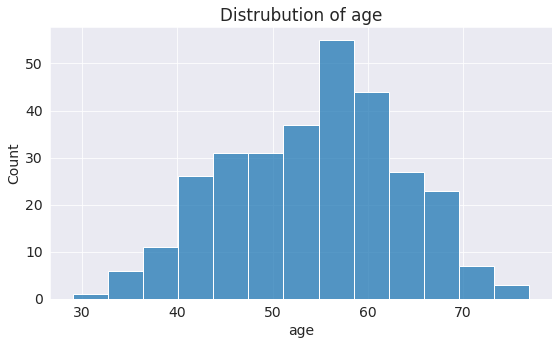

In [31]:
sns.histplot(heart_df['age'])
plt.title('Distrubution of age')

Most of the patients are aged between 50 to 60

lets create a new column of age group which will help us in our further analysis 

In [32]:
#function cretes a age group based on the input of age
def categorize_age(age):
    if age >= 29 and age <= 39:
        return 'Young Age'
    elif age >= 40 and age <= 49:
        return 'Middle_Age'
    elif age >= 50 and age <= 77:
        return 'Older_Age'
    else:
        return 'Other'

In [33]:
#Applying the converted data into our dataset with new column - Age_Range
heart_df['age_group']=heart_df['age'].apply(categorize_age)

In [34]:
heart_df.head()

,age,sex,Chest_pain_type,resting blood pressure,serum cholestrol level(mg/dl),fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of the peak exercise ST segment,number of major vessels colored by flourosopy,Thalessemia,target,age_group
0,63,Male,non-anginal pain,145,233,high,normal,150,0,2.3,downsloping,0,fixed defect,Yes,Older_Age
1,37,Male,atypical angina,130,250,normal,having ST-T wave abnormality,187,0,3.5,downsloping,0,normal blood flow,Yes,Young Age
2,41,Female,typical angina,130,204,normal,normal,172,0,1.4,upsloping,0,normal blood flow,Yes,Middle_Age
3,56,Male,typical angina,120,236,normal,having ST-T wave abnormality,178,0,0.8,upsloping,0,normal blood flow,Yes,Older_Age
4,57,Female,asymptomatic,120,354,normal,having ST-T wave abnormality,163,1,0.6,upsloping,0,normal blood flow,Yes,Older_Age


Now our df is having age_group column 

##### Lets see the number of patients in each age group 

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age Category')

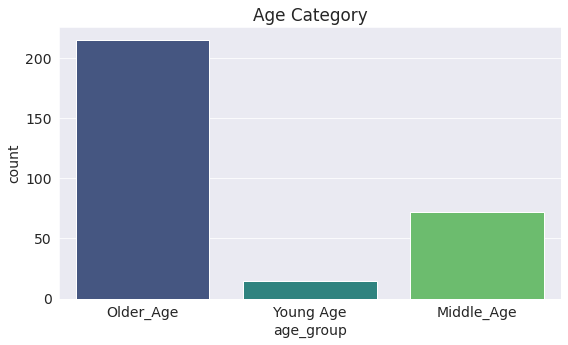

In [35]:
## Counts the no of population in each age group 
sns.countplot(heart_df['age_group'], palette = 'viridis')
plt.title('Age Category')

Most of the patients are in the old age i.e between 50 and 77

#### Now lets the count of male and female patients in our df

In [36]:
gender= heart_df['sex'].value_counts()
gender

Male      206
Female     96
Name: sex, dtype: int64

#### Now lets check how many patients are having a heart attack

In [37]:
# calculates the no of people having a heart attack
target_df=heart_df['target'].value_counts().reset_index(name = 'counts')
target_df

,index,counts
0,Yes,164
1,No,138


Text(0.5, 1.0, 'Heart Disease Population %')

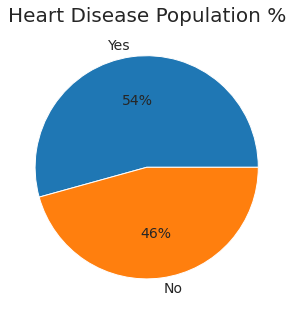

In [38]:
# Create a pie chart
plt.figure(figsize=(5, 7))
plt.pie(target_df['counts'], labels=target_df['index'], autopct='%0.0f%%',)
plt.title('Heart Disease Population %', fontsize=20)

54% of the people had a heart attack in the past



#### As we all know that the normal blood pressure of our body is 120/80 mm/Hg
#### Let's find out how many people are having high blood pressure?

In [39]:
high_blood_pressure=heart_df[heart_df['resting blood pressure'] > 120]

In [40]:
len(high_blood_pressure)

205

205 patients are having high blood pressure

Let us save and upload our work to Jovian before continuing

In [41]:
import jovian

In [42]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "roshanpatro1102/zerotopandas-course-project-starter-cf29f" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/roshanpatro1102/zerotopandas-course-project-starter-cf29f


'https://jovian.com/roshanpatro1102/zerotopandas-course-project-starter-cf29f'

## Asking and Answering Questions

We've got some details about the patients demographics and health conditions
In this section some specific questions and try to answer them using data frame operations and visualizations.

#### Q1:which gender is having high chances of heart attacks?


/tmp/ipykernel_46/1544031230.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel("Target",Size= 12)


Text(0, 0.5, 'Target')

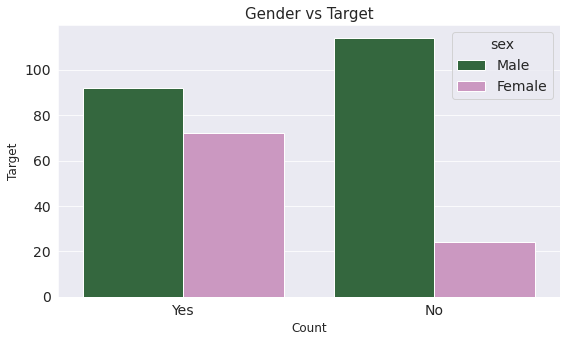

In [43]:
plt.figure(figsize=(9,5))
sns.countplot(x="target", data=heart_df, hue="sex", palette= 'cubehelix')
plt.title("Gender vs Target",size=15)
plt.xlabel("Count",size=12)
plt.ylabel("Target",Size= 12)

Nearly 45 % of males are having heart attack while 70% of females are having heart attack

#### Q2:At what age there is high risk of heart attack?

<AxesSubplot:title={'center':'Heart Disease Based On Age Category'}, xlabel='age_group', ylabel='count'>

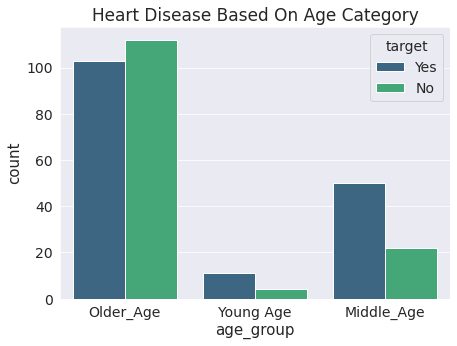

In [44]:
plt.figure(figsize=(7,5))
plt.title('Heart Disease Based On Age Category', fontsize=17,)
plt.xlabel('Age Group', fontsize=15)
plt.ylabel('Counts', fontsize=15)
sns.countplot(data =heart_df, x= 'age_group', hue='target',palette='viridis')

While most of the patients having heart are of old age middle age people are at higher risk of heart attack as out of 70 patients in this group 70% people are having a heart attack 

#### Q3: Which age group is having high blood pressure & is there any relation with heart attack?


Text(0.5, 1.0, 'High Blood Pressure Patients by Age and Gender')

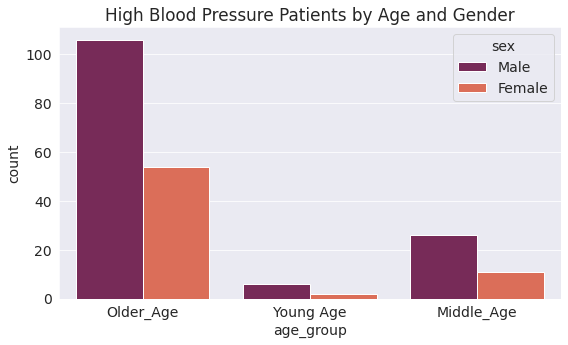

In [45]:
sns.countplot(data=high_blood_pressure,x='age_group', hue = 'sex',palette='rocket')
plt.title('High Blood Pressure Patients by Age and Gender')

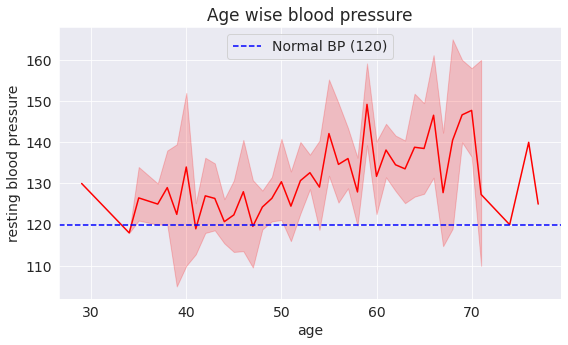

In [46]:
plt.title('Age wise blood pressure')
sns.lineplot(data = heart_df, x= 'age', y = 'resting blood pressure', color = 'r')
# Draw a dotted line at y = 120 (normal blood pressure)
plt.axhline(y=120, color='b', linestyle='--', label='Normal BP (120)')
plt.legend(loc='upper center')

As people get older they experience higher blood pressure as the blood vessels get stiffer with age.if people are having high blood pressure is there any risk of heart attack



In [47]:
# finds the no of people having high blood pressure and also having  heart attck 
high_bp=high_blood_pressure['target'].value_counts()
high_bp

Yes    104
No     101
Name: target, dtype: int64

Text(0, 0.5, 'Count')

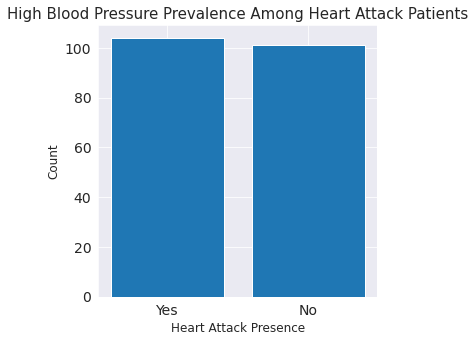

In [48]:
plt.figure(figsize=(5,5))
plt.bar(high_bp.index,high_bp.values)
plt.title("High Blood Pressure Prevalence Among Heart Attack Patients",size =15)
plt.xlabel("Heart Attack Presence",size =12)
plt.ylabel("Count",size =12)

The bar chart highlights a notable pattern: 50% of patients with heart attacks also have high blood pressure. This emphasizes a potential connection between heart attack and high blood pressure, implying that addressing high blood pressure might be pivotal in preventing or managing heart attacks effectively.

#### Q4: How cholesterol level affect cardiac health?

From John Hopkins medicine the range of serum cholesterol level are shown below

In [49]:
data = {'cholestrol_level': ['Less than 200 mg/dL', '200 to 239 mg/dL', 'At or above 240 mg/dL'],
        'Description': ['Normal', 'Borderline high', 'High']
       }

total_cholesterol_level_range_in_adults = pd.DataFrame(data)
total_cholesterol_level_range_in_adults

,cholestrol_level,Description
0,Less than 200 mg/dL,Normal
1,200 to 239 mg/dL,Borderline high
2,At or above 240 mg/dL,High


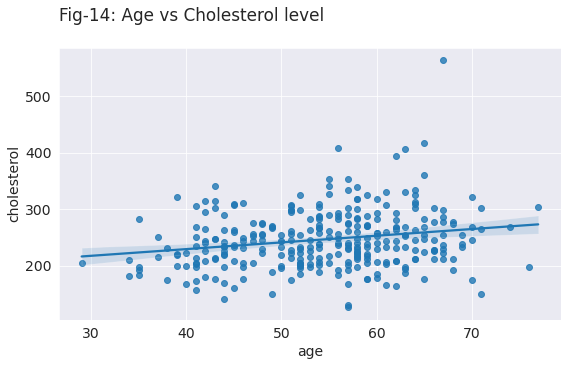

In [50]:
# Cholesterol corelation with age

sns.regplot(x='age', y='serum cholestrol level(mg/dl)', data=heart_df)
plt.title('Fig-14: Age vs Cholesterol level\n', loc='left')
plt.ylabel('cholesterol')
plt.show();

Cholesterol level is very high in people of age group around 60.

<AxesSubplot:title={'center':'Age and cholestrol level with heart attack'}, xlabel='Cholestrol Level', ylabel='Age'>

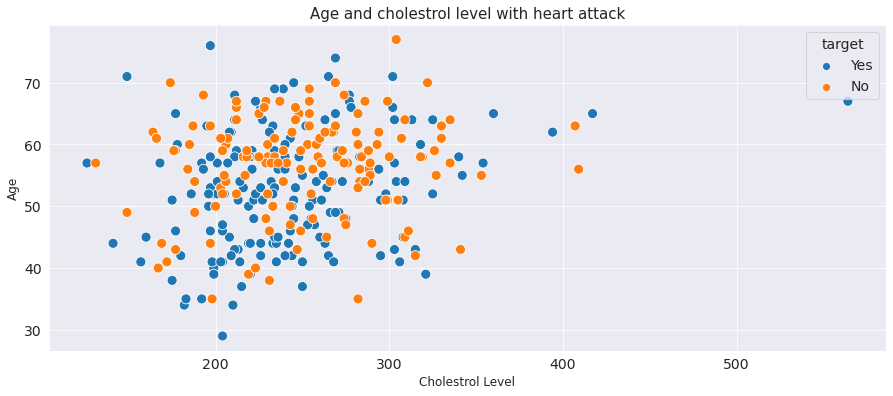

In [51]:
plt.figure(figsize= (15,6))
plt.title('Age and cholestrol level with heart attack',size= 15)
plt.xlabel('Cholestrol Level',size =12)
plt.ylabel('Age',size =12)
sns.scatterplot(data = heart_df, x= 'serum cholestrol level(mg/dl)', y= 'age', hue = 'target',s=100)

From the scatter plot it is clear that there is a strong co-relation between age and cholesterol levels as people get older the cholesterol level also tend to increase and they tend to experience heart attack



#### Q5 Does Thalassemia leads to heart attack?

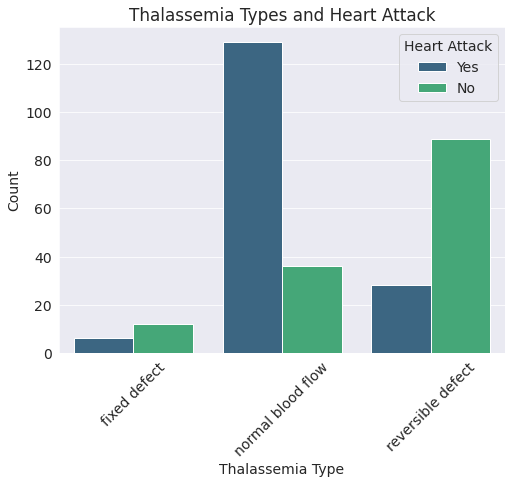

In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(data=heart_df, x='Thalessemia', hue='target', palette = 'viridis')
plt.title('Thalassemia Types and Heart Attack')
plt.xlabel('Thalassemia Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Heart Attack', loc='upper right')
plt.show()

Thalassemia is a heriditory  blood disorder caused when the body doesn’t make enough of a protein called hemoglobin.
* In fixed defect thalassemia, blood doesn't flow into heart or rarely flows. This is a severe case of low hemoglobin density in body. Eventually can lead to heart attack.
* In reversible defect somehow blood flows and treatement in this phase can stop complications. Though it is the most severe case of thalassemia.
* Reversible defect thalassemia is of two types alpha - depends on the number of genes inheritaed from parents; and beta-type depends on the affected part of hemoglobin.
<br>

The chart shows that most people with normal blood flow (at 78.8%) have heart attacks, followed by individuals with reversible defect thalassemia

#### Q6 Does Chest pain leads to heart attack?

There are 4 types 
1. Typical Angina: This refers to chest pain or discomfort often described as a squeezing or pressure-like sensation in the chest that can radiate to the arms, neck, or jaw. It's usually triggered by physical exertion or emotional stress and is relieved by rest or nitroglycerin.

2. Atypical Angina: This type of chest pain doesn't fit the typical pattern of heart-related chest pain. It might have different characteristics or be less predictable in its triggers. It could still be related to the heart, but it doesn't have the classic features of typical angina.

3. Non-Anginal: This category includes chest pain that is not caused by heart-related issues. It could be due to musculoskeletal problems, gastrointestinal issues, or other non-cardiac causes. The pain is not related to reduced blood flow to the heart.

4. Asymptomatic Chest Pain: This refers to chest discomfort or pain that occurs without any noticeable symptoms. In some cases, individuals might not even be aware of the chest pain. This can be concerning because heart issues could be present without obvious symptoms.

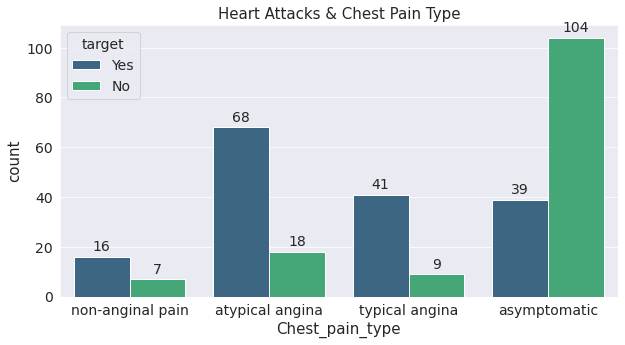

In [53]:
#countplot for people with chest_pain and having risk of heart attack
plt.figure(figsize=(10,5))
plt.title('Heart Attacks & Chest Pain Type', size = 15)
plt.xlabel('Chest Pain Type', size = 15)
plt.ylabel('Count', size = 15)

ax=sns.countplot(x= 'Chest_pain_type',hue = 'target', data = heart_df, palette= 'viridis')

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


From the graph it's clear that people having atypical and typical angina have higher risk of getting heart attack in the future

#### Q7 Does people having high blood sugar level have risk of heart attack?

Text(0.5, 1.0, 'Fasting blood sugar level and risk of Heart disease')

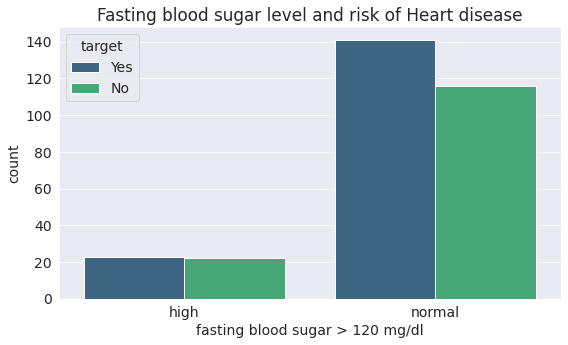

In [54]:
sns.countplot(x='fasting blood sugar > 120 mg/dl', hue='target', data=heart_df, palette ='viridis')
plt.title('Fasting blood sugar level and risk of Heart disease')


It shows that people having high blood pressure or normal blood pressure they are equally likely to have a heart attack but High blood sugar can damage blood vessels and lead to inflammation, increasing the risk of cardiovascular diseases.

#### Q8 What other attributes can create a potential risk of heart attack?

In [55]:
df= pd.read_csv(heart)

In [56]:
# Calculate correlations
correlation_matrix = df.corr()
correlation_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


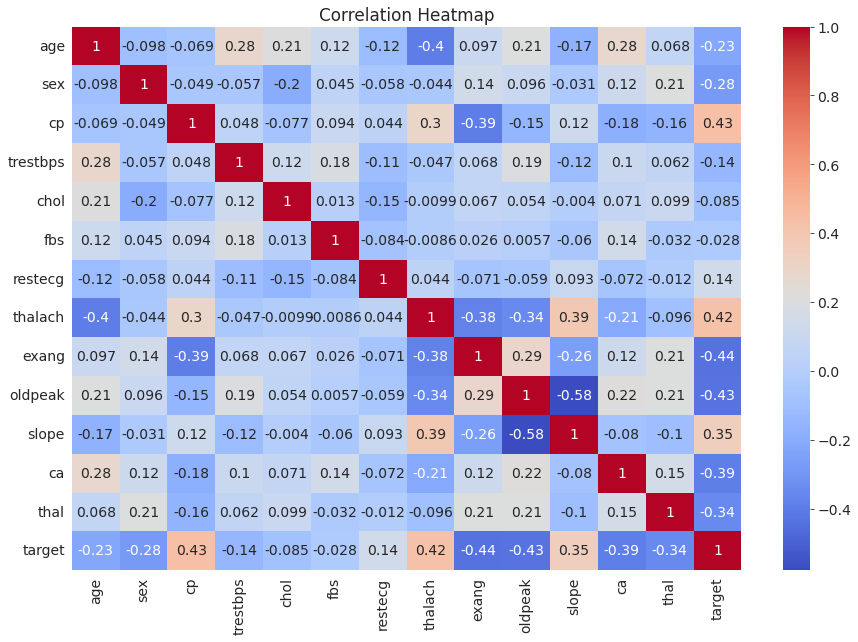

In [57]:
#create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

1. There is a strong negative correlation between the ages of the individuals their maximum heart rate achieved. 
2. There is also a slightly strong negative correlation between the ST depression induced by exercise relative to rest and the maximum heart rate achieved of individuals. 
3. There is negative correlations of the target with thalessemia 
4. positive relation with chest pain with target, also with slope and oldpeak.

Let us save and upload our work to Jovian before continuing.

In [58]:
import jovian

In [59]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "roshanpatro1102/zerotopandas-course-project-starter-cf29f" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/roshanpatro1102/zerotopandas-course-project-starter-cf29f


'https://jovian.com/roshanpatro1102/zerotopandas-course-project-starter-cf29f'

## Inferences and Conclusion

We've drawn many inferences from the survey. Here's a summary of a few of them:

1. 54% of the people had a heart attack in the past from which 95 are male and 75 are females 
2. Females have higher risk of having a heart attack as compared to males
3. Mostly people at old age have the risk of heart attack as with age cholestrol and blood pressure increases 
4. High blood pressure, fasting blood sugar > 120mg/dl can lead to heart attack 
5. patients  having atypical and typical angina have higher risk of getting heart attack in the future
6. In case of thalassemia patients having normal blood flow are at greter risk of having heart attacks, followed by individuals with reversible defect thalassemia
7. strong negative correlation between the ages of the individuals their maximum heart rate achieved


In [60]:
import jovian

In [61]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "roshanpatro1102/zerotopandas-course-project-starter-cf29f" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/roshanpatro1102/zerotopandas-course-project-starter-cf29f


'https://jovian.com/roshanpatro1102/zerotopandas-course-project-starter-cf29f'

## References and Future Work

The references were taken from 

kaggle notebook- https://www.kaggle.com/code/chiemelachinedum/eda-for-the-possibilities-of-heart-attack
https://www.cdc.gov/ncbddd/thalassemia/facts.html

https://openai.com

https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/symptoms-causes/syc-20350800#:~:text=With%20high%20cholesterol%2C%20you%20can,a%20heart%20attack%20or%20stroke.


Libraries used

pandas https://pandas.pydata.org/docs/user_guide/index.html#user-guide 

seaborn https://seaborn.pydata.org/tutorial/axis_grids.html

matplotlib https://matplotlib.org/stable/tutorials/introductory/quick_start.html


### Future work
1. As the dataset used in my analysis dates back to 1988 hence  
analyzing trends over time by comparing the dataset from 1988 to more recent datasets. This can reveal how the relationships between factors and heart attacks have evolved over the years.
2. Using machine learning models the dataset can be used  to forecast the likelihood of heart attacks based on the available factors. This could help in early detection and prevention


In [62]:
import jovian

In [63]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "roshanpatro1102/zerotopandas-course-project-starter-cf29f" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/roshanpatro1102/zerotopandas-course-project-starter-cf29f


'https://jovian.com/roshanpatro1102/zerotopandas-course-project-starter-cf29f'